# Programming Languages Popularity Analysis

## Brief Description 📑:

How can you determine which programming languages and technologies are most widely used? Which languages are gaining or losing popularity, helping you decide where to focus your efforts?

One excellent data source is Stack Overflow, a programming question-and-answer site with more than 16 million questions on programming topics. Each Stack Overflow question is tagged with a label identifying its topic or technology. By counting the number of questions related to each technology, you can estimate the popularity of different programming languages.

In this project, we will use data from the Stack Exchange Data Explorer to examine how the relative popularity of R, Python, Java, and JavaScript has evolved over time using real-world Stack Overflow data from 2008 to 2020.
We'll work with a dataset containing one observation per tag per year, including the number of questions for that tag and the total number of questions that year.

`stack_overflow_data.csv`
|Column|Description|
|------|-----------|
|`year`|The year the question was asked (2008-2020)|
|`tag`|A word or phrase that describes the topic of the question|
|`num_questions`|The number of questions with a certain tag in that year|
|`year_total`|The total number of questions asked in that year|

## Skills and Techniques Will be Used 🛠️ :
- Data Wrangling with `dplyr`

- Data Visualization with `ggplot2`

- `Data Exploration` and `Trend Analysis`

- `Growth Rate Analysis` across years

- Effective `Communication of Insights`

- `R` Programming Basics

In [ ]:
# Load necessary packages
library(readr)
library(dplyr)
library(ggplot2)
library(scales)
library(knitr)
library(kableExtra)

## Data Loading 📥 
In this step, we load our dataset containing programming language tags from Stack Overflow.
The dataset includes the number of questions per tag and per year, from 2008 to 2020.
Loading the data into R using read_csv() allows us to start exploring and analyzing it efficiently.

In [ ]:
# Load the dataset
data <- read_csv("stack_overflow_data.csv")

## Creating a New Metric: Fraction of Questions 🛠️ 
Here, we create a new column called fraction, which represents the percentage of questions related to each programming language compared to the total questions that year.
This helps us better compare languages fairly across different years, regardless of the total number of Stack Overflow questions growing over time.

In [ ]:
data <- data %>%
  mutate(fraction = num_questions / year_total * 100)

r_over_time <- data %>%
  filter(tag == "r") %>%
  as.data.frame()  # Ensure it's a dataframe

# Display the result
r_over_time

year,tag,num_questions,year_total,fraction
<dbl>,<chr>,<dbl>,<dbl>,<dbl>
2008,r,8,168541,0.00474662
2009,r,523,981124,0.05330621
2010,r,2264,1970729,0.11488135
2011,r,5835,3473395,0.16799126
2012,r,12183,4787010,0.25450124
2013,r,22256,6037170,0.36864955
2014,r,30923,6431458,0.48080855
2015,r,40704,6612772,0.61553612
2016,r,44365,6593600,0.67284943


## Filtering Data for Specific Languages (R Language) 🔍 
In this step, we focus on the "r" tag to specifically analyze how the popularity of R programming has evolved over the years.
By filtering the data, we can zoom in on trends for one particular language.

In [ ]:
# Filter for the year 2020 and R tag
r_percentage <- data %>%
  filter(year == 2020, tag == "r") %>%
  summarize(r_percentage = (num_questions / year_total) * 100) %>%
  pull(r_percentage)

# Display the result
r_percentage


[1] 0.9658242

We calculate how popular R was in the year 2020 by finding what percentage of all questions were tagged with R.
This gives us a snapshot of R’s standing at the end of our dataset timeline.

## Identifying the Most Popular Languages (2015–2020) 🏆 

In [ ]:
# Filter for the years between 2015 and 2020, group by tag, and sum the questions
highest_tags <- data %>%
  filter(year >= 2015 & year <= 2020) %>%
  group_by(tag) %>%
  summarize(total_questions = sum(num_questions)) %>%
  arrange(desc(total_questions)) %>%
  head(5) %>%
  pull(tag)	

# Display the result
highest_tags


[1] "javascript" "python"     "java"       "android"    "c#"

Here, we found out which five programming languages had the most Stack Overflow questions between 2015 and 2020.
Grouping by tag and summing the number of questions shows us where the most activity and interest were concentrated during this period.

## Growth Analysis: Finding the Language with the Fastest Growth 📈 

In [ ]:
# Load necessary library
library(dplyr)

# Calculate the fraction of questions per tag, per year
yearly_changes <- data %>%
  group_by(year) %>%
  mutate(total_questions_per_year = sum(num_questions)) %>%  # Calculate total questions for each year
  ungroup() %>%
  mutate(fraction_question = num_questions / total_questions_per_year) %>%  # Calculate fraction of questions per year
  arrange(tag, year) %>%  # Ensure chronological order
  group_by(tag) %>%
  mutate(ratio = fraction_question / lag(fraction_question)) %>%  # Calculate ratio compared to the previous year
  ungroup() %>%
  filter(!is.na(ratio)) %>%  # Remove rows where the ratio is NA (first year)
  slice_max(ratio, n = 1)    # Get the row with the highest ratio for each tag

# Find the tag with the highest ratio
highest_ratio_tag <- yearly_changes %>%
  slice_max(ratio, n = 1) %>%  # Get the overall highest ratio
  pull(tag)  # Extract the tag name

# Display the result
highest_ratio_tag

[1] "swiftui"

In this step, we explore which programming language experienced the biggest year-over-year growth at any point during our time frame [ Which is "Swiftui"].

We calculate a growth ratio compared to the previous year for each tag.
This helps identify languages that had explosive surges in popularity.

In [ ]:
growth_data <- data %>%
  group_by(tag) %>%
  arrange(year) %>%
  mutate(prev_fraction = lag(num_questions / year_total)) %>%
  mutate(ratio = (num_questions / year_total) / prev_fraction) %>%
  filter(!is.na(ratio))

# Max growth
max_growth <- growth_data %>%
  filter(ratio == max(ratio)) %>%
  select(tag, year, ratio)

print(max_growth)

# A tibble: 54,279 × 3
# Groups:   tag [54,279]
   tag                  year ratio
   <chr>               <dbl> <dbl>
 1 model-binding        2009  1.63
 2 mysql-error-1045     2009  2.92
 3 blocking             2009  6.10
 4 nantcontrib          2009  1.72
 5 tabbar               2009  4.98
 6 mod-rails            2009  2.92
 7 attached-properties  2009  4.29
 8 floating-accuracy    2009  1.66
 9 compiler-errors      2009  1.67
10 django-signals       2009  1.72
# ℹ 54,269 more rows


### In this step, we dive deeper into how different programming technologies grew over time:

- First, we group the dataset by each programming language (tag).

- Then, we arrange the data in chronological order (year) for each tag.

- Using lag(), we calculate the previous year's fraction of questions for each tag.

- We then compute a growth ratio by dividing the current year's fraction by the previous year's fraction.

- This ratio tells us how much bigger (or smaller) a tag's popularity became compared to the previous year.
A ratio greater than 1 means growth, while less than 1 means decline.

### Key Insights for this Step:
- From the output, we observe that the "blocking" tag had the highest growth ratio in 2009, with a ratio of 6.10.
- This suggests that the "blocking" topic grew by over 6 times its previous year's relative popularity — a massive surge, even though the tag itself might be niche compared to larger languages.

# Visualizations:

## Line Chart: Popularity Over Time 📈 

In [ ]:
# Add percentage column
data <- data %>%
  mutate(fraction = num_questions / year_total * 100)

# Filter for key languages
tags_of_interest <- c("python", "java", "javascript", "r")
filtered_data <- data %>%
  filter(tag %in% tags_of_interest)

# Set correct plot size
options(repr.plot.width = 34, repr.plot.height = 15)
# Line chart
ggplot(filtered_data, aes(x = year, y = fraction, color = tag)) +
  geom_line(linewidth = 1.7) +
  geom_point(size = 5) +
  scale_x_continuous(breaks = 2008:2020) +
  labs(
    title = "Popularity of Programming Languages (2008–2020)",
    x = "Year",
    y = "Percentage of Questions (%)",
    color = "Language"
  ) +
  theme_minimal(base_size = 22)



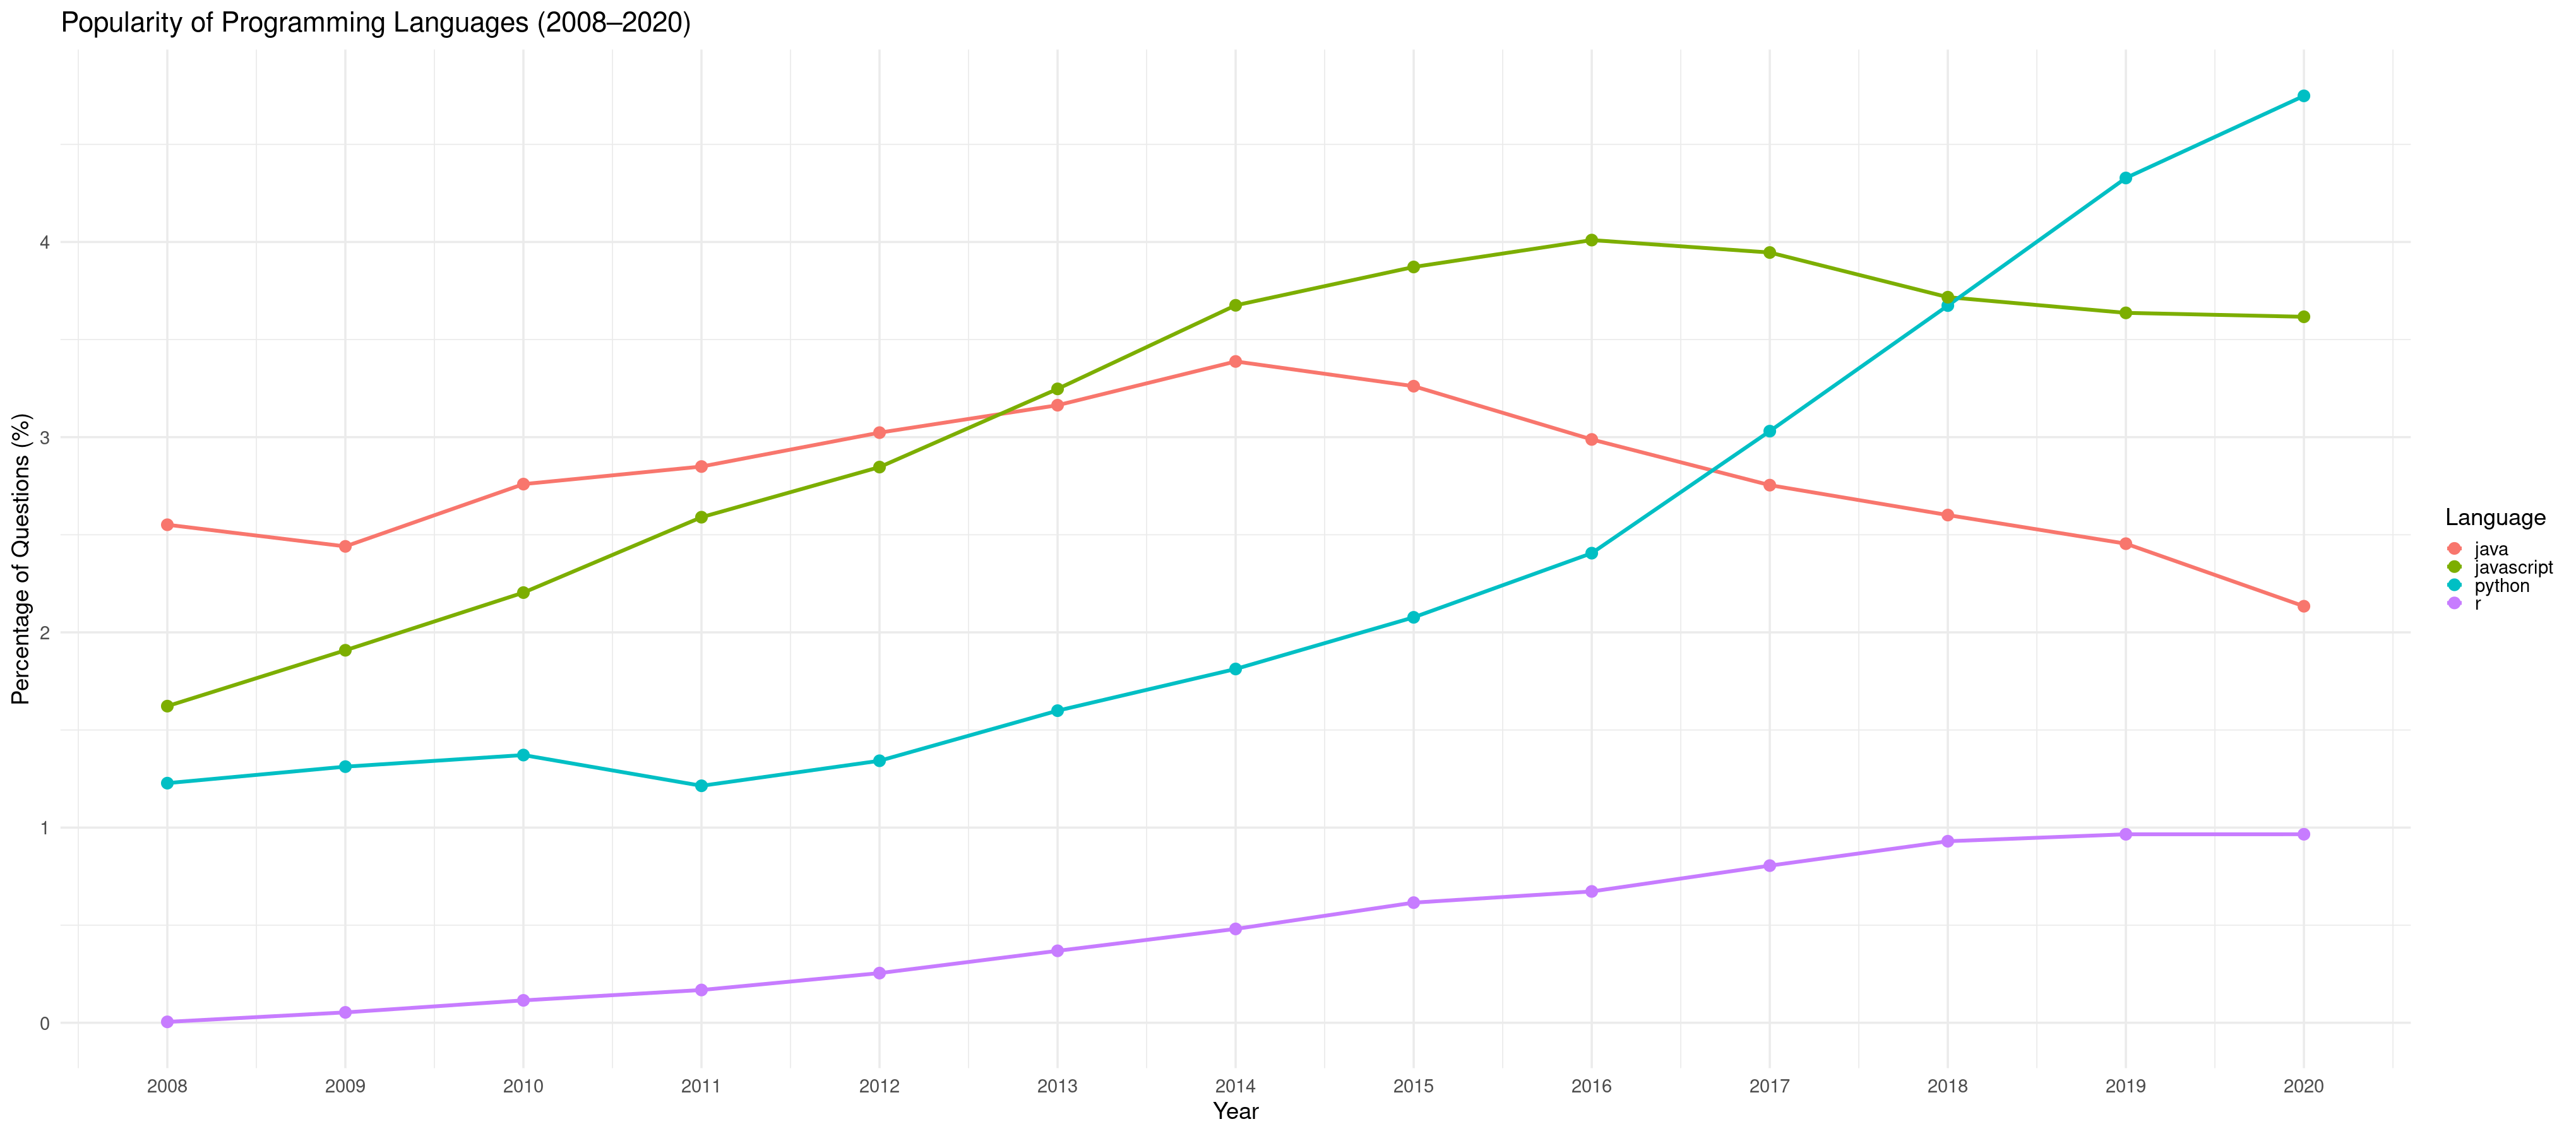

Now, we visualize how the popularity of Python, Java, JavaScript, and R evolved over time.
Each line represents a programming language, showing its share of total questions each year.
From the chart, we can quickly see which languages are rising stars and which ones are fading.

## Key Insights:
- Python's popularity skyrocketed after 2012, while JavaScript maintained strong growth.
Java saw slower but steady trends, and R remained relatively stable but niche.

## Bar Chart: Top Languages (2015–2020) 📊 

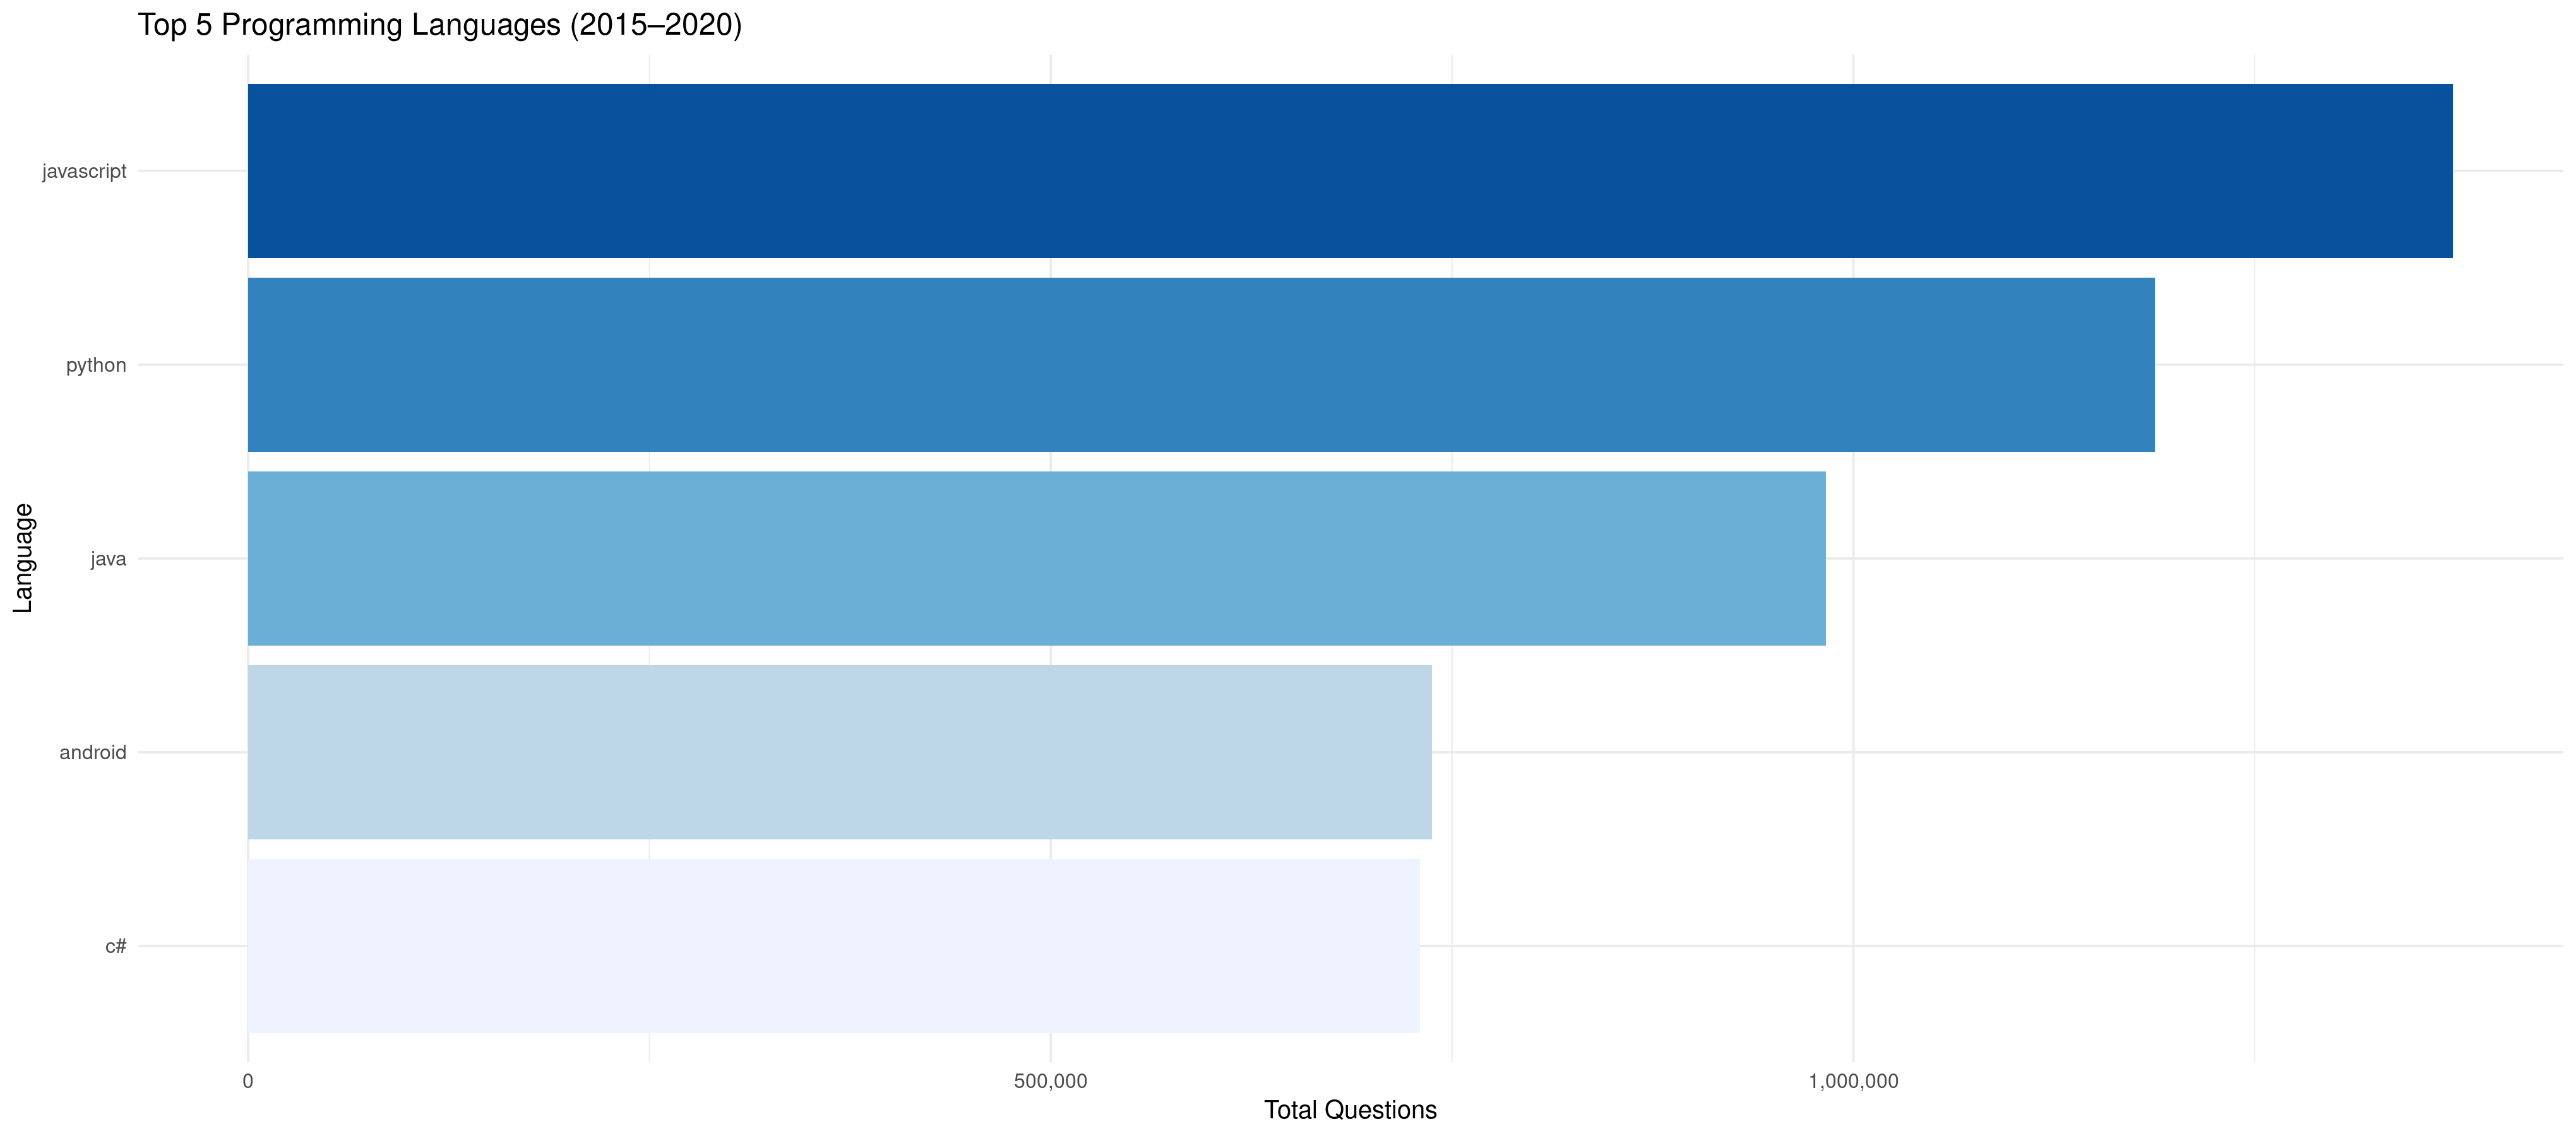

In [17]:
top_tags <- data %>%
  filter(year >= 2015 & year <= 2020) %>%
  group_by(tag) %>%
  summarize(total_questions = sum(num_questions)) %>%
  arrange(desc(total_questions)) %>%
  slice(1:5) %>%
  mutate(tag = factor(tag, levels = rev(tag))) 

options(repr.plot.width = 34, repr.plot.height = 15)

# Plot
p2 <- ggplot(top_tags, aes(x = reorder(tag, total_questions), y = total_questions, fill = tag)) +
  geom_col(show.legend = FALSE) +
  coord_flip() +
  scale_fill_brewer(palette = "Blues") +
  scale_y_continuous(labels = comma) +  # ← makes the numbers readable
  labs(
    title = "Top 5 Programming Languages (2015–2020)",
    x = "Language",
    y = "Total Questions"
  ) +
  theme_minimal(base_size = 24)
print(p2)

Here, we create a bar chart showing the total number of Stack Overflow questions for the top 5 languages during 2015–2020.
Using horizontal bars makes it easier to compare across languages visually.
We also color-code the bars for a clean and professional look.

##  Key Insights for this Plot:
- JavaScript leads the chart, followed closely by Python and Java.
Mobile development (Android) and enterprise programming (C#) also remain highly popular.

## Conclusion Summary ✨:
- Our exploration shows that Python and JavaScript have gained massive popularity over the years,
- while Java and R have remained consistent but at a slower growth rate.
- SwiftUI showed a rapid rise, indicating new technologies quickly capturing developer interest.
- This information is incredibly valuable for anyone deciding where to invest their time learning.
